# Comparative Time Series Analysis and Forecasting of Wheat Prices in Germany and Belgium Amidst Global Challenges

<img src='images/wheat.png'/>

## Team Name: Time Travelers
The team is composed of the following individuals:

* Muhammad Bilal Khan
* Sheraz Altaf
* Farwa Khalid

## About data:
### Data downloaded on February 10, 2024
We are currently engaged in the analysis of a dataset obtained from the Food and Agriculture Data - [FAOSTAT](https://www.fao.org/faostat/en/#data/CP) website, specifically focusing on the producer prices within the “prices” data category.

### Column descrpition:

* **`Domain Code`**: This code identifies the domain of the data

* **`Domain`**: This column provides a more descriptive name for the domain code

* **`Area Code`**: This code identifies the country or territory

* **`Area`**: This column provides the full name of the country

* **`Element Code`**: This code identifies the specific element within the domain

* **`Element`**: This column provides a more descriptive name for the element code.

* **`Item Code`**: This code identifies the specific item within the element

* **`Item`**: This column provides the full name of the item.

* **`Year`**: This column specifies the year for which the data is reported.

* **`Months`**: This column specifies the month or months for which the data is reported.

* **`Unit`**: This column specifies the unit of measurement for the data

* **`Value`**: This column shows the actual data value, which is the producer price of wheat in Belgium for the specified month(s) and year.

* **`Flag Description`**: This column provides information about the quality of the data, such as whether it is official or unofficial.

## Acknowledgement
Our analysis is grounded in a dataset sourced from the [FAOSTAT](https://www.fao.org/faostat/en/#data/CP) database, focusing on producer prices within the "prices" category for Germany and Belgium, with a specific emphasis on wheat. Covering a period from 2010 to 2022, this dataset provides a window into understanding the price trends and informing our forecasts.

# Abstract

In this notebook, we undertake a detailed time series analysis to examine the fluctuations in wheat prices within Germany and Belgium, expressed in local currency units (LCU). Our investigation aims to decode the patterns of wheat pricing and assess their impact on food inflation in these European contexts. To this end, we have compiled data from the Food and Agriculture Organization of the United Nations (FAO) and employed a suite of time series models, such as Autoregression (AR), ARIMA, and Seasonal ARIMA (SARIMA).
Our methodological approach includes rigorous tests such as the Augmented Dickey-Fuller (ADF) test to ensure the stationarity of the time series data, which is a prerequisite for the reliability and validity of our models. Through analysis and comparison of the models, ARIMA stands out as the most effective in accurately capturing the market's complexities and offering steady predictions.
Our approach has been carefully structured to mitigate the constraints, aiming to deliver a profound understanding of the agricultural economic trends that shape future inflation rates.
By deploying the ARIMA model, which has been optimized for our specific datasets, we provide stakeholders with valuable insights and forecasts that can inform decision-making. This report elucidates the dynamic processes driving wheat prices and presents a thorough forecast that underlines the anticipated market movements in Germany and Belgium, contributing to a strategic outlook on agricultural economics and inflationary expectations.


In [201]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error
# import warnings
import warnings
warnings.filterwarnings('ignore')

In [202]:
food_inflation = pd.read_csv('data/food-price-inflation.csv')
prices = pd.read_csv('data/producer-price.csv')
xchange = pd.read_csv('data/exchange-rates.csv')


In [203]:
def print_heading(data):
  print('-'*60)
  print(data.upper())
  print('-'*60)

# Data Inspection

In [204]:
prices.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
0,PP,Producer Prices,8,Albania,5530,Producer Price (LCU/tonne),1253.02,"Onions and shallots, dry (excluding dehydrated)",2010,2010,7001,January,LCU,34000.0,A,Official figure
1,PP,Producer Prices,8,Albania,5530,Producer Price (LCU/tonne),1253.02,"Onions and shallots, dry (excluding dehydrated)",2010,2010,7002,February,LCU,51000.0,A,Official figure
2,PP,Producer Prices,8,Albania,5530,Producer Price (LCU/tonne),1253.02,"Onions and shallots, dry (excluding dehydrated)",2010,2010,7003,March,LCU,69000.0,A,Official figure
3,PP,Producer Prices,8,Albania,5530,Producer Price (LCU/tonne),1253.02,"Onions and shallots, dry (excluding dehydrated)",2010,2010,7004,April,LCU,69000.0,A,Official figure
4,PP,Producer Prices,8,Albania,5530,Producer Price (LCU/tonne),1253.02,"Onions and shallots, dry (excluding dehydrated)",2010,2010,7005,May,LCU,53000.0,A,Official figure


In [205]:
prices.describe()

,Area Code (M49),Element Code,Item Code (CPC),Year Code,Year,Months Code,Value
count,17699.000000,17699.0,17699.000000,17699.000000,17699.000000,17699.000000,1.769900e+04
mean,418.266343,5530.0,806.689949,2016.279168,2016.279168,7006.534211,4.877168e+05
std,251.151323,0.0,578.886684,3.733824,3.733824,3.436606,2.507505e+06
min,8.000000,5530.0,111.000000,2010.000000,2010.000000,7001.000000,6.000000e+00
25%,191.000000,5530.0,111.000000,2013.000000,2013.000000,7004.000000,5.920000e+02
50%,410.000000,5530.0,1234.000000,2016.000000,2016.000000,7007.000000,2.821800e+03
75%,643.000000,5530.0,1253.020000,2020.000000,2020.000000,7009.000000,3.772900e+04
max,887.000000,5530.0,1802.000000,2022.000000,2022.000000,7012.000000,4.723333e+07


In [206]:
prices.columns

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year',
       'Months Code', 'Months', 'Unit', 'Value', 'Flag', 'Flag Description'],
      dtype='object')

In [207]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17699 entries, 0 to 17698
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       17699 non-null  object 
 1   Domain            17699 non-null  object 
 2   Area Code (M49)   17699 non-null  int64  
 3   Area              17699 non-null  object 
 4   Element Code      17699 non-null  int64  
 5   Element           17699 non-null  object 
 6   Item Code (CPC)   17699 non-null  float64
 7   Item              17699 non-null  object 
 8   Year Code         17699 non-null  int64  
 9   Year              17699 non-null  int64  
 10  Months Code       17699 non-null  int64  
 11  Months            17699 non-null  object 
 12  Unit              17699 non-null  object 
 13  Value             17699 non-null  float64
 14  Flag              17699 non-null  object 
 15  Flag Description  17699 non-null  object 
dtypes: float64(2), int64(5), object(9)
memor

In [208]:
items = prices.Item.unique().tolist()
items.sort()
print_heading('Food Comodities')
for item in items:
    print(' - ' + item)


------------------------------------------------------------
FOOD COMODITIES
------------------------------------------------------------
 - Onions and shallots, dry (excluding dehydrated)
 - Rice
 - Sugar cane
 - Tomatoes
 - Wheat


## Comoditity Choice

In [209]:
ITEM = 'Wheat'

#### DataProcesser and DataManager:
This code defines two classes, DataProcesser and DataManager. DataProcesser is responsible for processing a DataFrame, including subsetting it based on item and country, converting year and month columns to datetime, and getting date and value columns while calculating mean and standard deviation. DataManager is responsible for managing multiple DataProcesser instances, each corresponding to a specific country.

In [210]:
class DataProcesser:

    def __init__(self, df):
        self.df = df  
        self.stats = None  

    # Subset the DataFrame based on item and country
    def subset_data(self, item, country, item_col='Item', area_col='Area'):       
        self.df = self.df[(self.df[item_col] == item) & (self.df[area_col] == country)]
        return self

    # Convert year and month columns to datetime
    def convert_to_date(self, year_col='Year', month_col='Months'):
        self.df[year_col] = self.df[year_col].astype(str)
        self.df[month_col] = self.df[month_col].astype(str)
        self.df['Date'] = pd.to_datetime(self.df[year_col] + '-' + self.df[month_col])
        return self

    # Get date and value columns, calculate mean and std
    def get_date_and_value(self, date_col='Date', value_col='Value'):
        self.df = self.df[[date_col, value_col]].set_index(date_col)
        mean = self.df.describe().loc['mean'][0]
        std = self.df.describe().loc['std'][0]

        self.stats = {
            'mean' : mean,
            'std' : std
            }           
        
        return self
    
class DataManager:
    def __init__(self):
        self.data_processors = {}  # Placeholder for DataProcesser instances

    # Process data for a specific country
    def process_data_for_country(self, raw_data, country, item=ITEM):
        dp = DataProcesser(raw_data)
        dp.subset_data(item, country).convert_to_date().get_date_and_value()
        self.data_processors[country] = dp  # Store the DataProcesser instance
        return dp  # Optionally return the DataProcesser instance

    # Get the DataProcesser instance for a specific country
    def get_data_processor(self, country):
        return self.data_processors[country]
        
    # Get all dataframes from all DataProcesser instances
    def get_all_dataframes(self):
         return [{country: processor.df} for country, processor in self.data_processors.items()]

# EUROPE

## Strategy:
In this study, we aim to predict the prices of wheat in four European nations: Germany, Belgium, Spain, and Italy. We will concentrate on the prices that wheat growers receive, denominated in their respective local currencies. To forecast these prices, we will employ a range of time series modeling techniques and choose the model that delivers the most accurate predictions.

In [211]:
# Create DataManager instance
data_manager = DataManager()

countries = ['Germany', 'Belgium']

# Process and store data for each country
data_processors = {country: data_manager.process_data_for_country(prices, country) for country in countries}

# Retrieve processed data for each country
wheat_prices = {country: data_manager.get_data_processor(country).df for country in countries}

# Retrieve processed data for each country
germany_wheat_prices= wheat_prices['Germany']
belgium_wheat_prices = wheat_prices['Belgium']


# Example subset display
print_heading(f"Subset display WRT {ITEM} Producer prices in LCU/tonne")
germany_wheat_prices.head()


# combine the wheat prices into one dataframe with columsn names as Germany, Belgium, Spain, Italy
wheat_prices = pd.concat([germany_wheat_prices, belgium_wheat_prices], axis=1)
wheat_prices.columns = countries
wheat_prices.tail()

------------------------------------------------------------
SUBSET DISPLAY WRT WHEAT PRODUCER PRICES IN LCU/TONNE
------------------------------------------------------------


,Germany,Belgium
Date,,
2022-08-01,309.8,296.4
2022-09-01,312.0,309.4
2022-10-01,325.1,322.9
2022-11-01,311.4,307.5
2022-12-01,287.7,285.7


In [212]:
germany_wheat_prices.shape

(144, 1)

## Food Price Inflation Data

In [213]:
data_manager_inflation = DataManager()

# Process and store data for each country
inflation_data_processors = {country: data_manager_inflation.process_data_for_country(food_inflation, country, 'Food price inflation') for country in countries}

# Retrieve processed data for each country
food_inflation_data = {country: data_manager_inflation.get_data_processor(country).df for country in countries}

germany_food_inflation = food_inflation_data['Germany']
belgium_food_inflation = food_inflation_data['Belgium']

In [214]:
# combine inflations prices into one
food_inflation = pd.concat([germany_food_inflation, belgium_food_inflation], axis=1)
food_inflation.columns = countries
food_inflation.tail()

,Germany,Belgium
Date,,
2023-05-01,14.473669,16.387397
2023-06-01,13.391300,15.064423
2023-07-01,10.912226,13.857841
2023-08-01,9.083272,13.414873
2023-09-01,7.685906,11.434745


 ## Plotting Comodity Prices Over Time in Europe

In [215]:
import plotly.graph_objects as go

def plot_lines(dfs, title, xlabel, ylabel):
    # Create a figure
    fig = go.Figure()

    # Add traces for each country
    for country, df in dfs.items():
        mean = df['Value'].mean()
        legend_name = f"{country} (mean: {mean:.2f})"
        column = 'Value' if 'Value' in df.columns else 'Predicted'
        fig.add_trace(go.Scatter(x=df.index, y=df[column], mode='lines', name=country))

    # Update layout with title and axis labels
    fig.update_layout(
        title={'text': title, 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
        xaxis_title=xlabel,
        yaxis_title=ylabel,
        font=dict(size=15),
        legend_title="Country",
        margin=dict(l=20, r=20, t=40, b=20)
    )

    
    # Show plot
    fig.show()

all_wheat_prices = data_manager.get_all_dataframes()
# Usage:
all_data = {}
for country_data in all_wheat_prices:
    for country, df in country_data.items():
        all_data[country] = df

# Note: Adjust the 'Value' column name if your dataframe has a different column for values
plot_lines(all_data, f'Trend of {ITEM} Prices Over Time in Europe', 'Year', f'{ITEM} Prices LCU/Tonne - EURO')

 ## Last 5 Years of Wheat Prices in Europe 

  * `Germany`:
      * Prices start at `148.0` in Jan 2018 and show an increasing trend over the five years.
      * There is a significant jump in prices beginning in March 2022, peaking at `379.7` in April 2022.
      * Prices decrease after the peak but remain elevated compared to the start of 2018.

  * `Belgium`:
      * Prices also start at `137.0` in Jan 2018 and generally increase over the period.      
      * The peak is observed in November 2021 at `276.4`, followed by a decline but with prices staying high relative to 2018 levels.

  * `Spain`:
      * The initial price is `181.0` in Jan 2018, with an increasing trend over the years.
      * There are missing values for June 2018, June 2019, and June 2021.
      * The peak price is reached in September 2021 at `256.8`, after which prices start to decline to `323.0` in December 2022.

  * `Italy`:
      * Starting at `191.0` in Jan 2018, Italy's prices also follow an upward trend.
      * Prices surge significantly in 2021 with the highest price of `447.4` in January 2022.
      * A decline follows the peak, similar to the other countries.

  * All four countries exhibit a significant increase in wheat prices beginning around 2021 or early 2022, with the peak prices mostly occurring in 2021 or 2022.

  * After the peak, there is a general trend of declining prices, but they still remain higher than the initial prices in 2018.

## Plotting Food Inflation Over Time in Europe

In [216]:
# plot inflation
all_food_inflation = data_manager_inflation.get_all_dataframes()
# Usage:
all_data = {}
for country_data in all_food_inflation:
    for country, df in country_data.items():
        all_data[country] = df

plot_lines(all_data, f'Trend of Food Inflation Over Time in Europe', 'Year', f'Food Inflation %')

 ## Last 5 Years of Food Inflation in Europe

  * `Germany` has seen fluctuations in food inflation with periods of increase and decrease. Notably, there was a significant rise starting in 2022, peaking in March 2023 at `21.198%`, followed by a notable decline towards September 2023.

  * `Belgium` displayed a generally increasing trend in food inflation over the five years, with the highest rate recorded in `March 2023` at 
  `18.024%`. There were periods of negative inflation (deflation) during 2021, but these were followed by a sharp uptick in 2022 and 2023.

  * `Spain's` food inflation trend is characterized by a gradual increase over the years, with a sharp rise in 2022 and a peak in February 2023 at `16.635%`, followed by a decrease in subsequent months.

  * `Italy` closely followed Spain's pattern with regard to food inflation, exhibiting the same peak in February 2023 of `16.635%`. This suggests similar economic conditions affecting food prices in both countries.

  * All four countries experienced their highest food inflation rates in `early 2023`, which then began to decline, yet still remained at elevated levels compared to the beginning of the observed period in 2018.


# Seasonal Decomposition

In [217]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

def plot_decomposition(decomposition, country):
    # Create subplots: 2 rows, 2 cols
    fig = make_subplots(rows=2, cols=2, subplot_titles=('Observed', 'Trend', 'Seasonality', 'Residual'))

    # Observed
    fig.add_trace(
        go.Scatter(x=decomposition.observed.index, y=decomposition.observed, name='Observed',
                   line=dict(color='#0000ff', width=1.5)),
        row=1, col=1
    )

    # Trend
    fig.add_trace(
        go.Scatter(x=decomposition.trend.index, y=decomposition.trend, name='Trend',
                   line=dict(color='#0000ff', width=1.5)),
        row=1, col=2
    )

    # Seasonality
    fig.add_trace(
        go.Scatter(x=decomposition.seasonal.index, y=decomposition.seasonal, name='Seasonality',
                   line=dict(color='#0000ff', width=1.5)),
        row=2, col=1
    )

    # Residual
    fig.add_trace(
        go.Scatter(x=decomposition.resid.index, y=decomposition.resid, name='Residual',
                   line=dict(color='#0000ff', width=1.5)),
        row=2, col=2
    )

    # Update layout
    fig.update_layout(height=800, width=1000, title_text=f"Time Series Decomposition - {country}",
                      title_font_size=30, showlegend=False)

    # Update xaxes and yaxes
    fig.update_xaxes(title_text="Time")
    fig.update_yaxes(title_text="Value")

    fig.show()# plot seasonal decomposition
 


In [218]:
germany_wheat_prices

,Value
Date,
2011-01-01,235.0
2011-02-01,245.0
2011-03-01,225.0
2011-04-01,235.0
2011-05-01,241.0
...,...
2022-08-01,309.8
2022-09-01,312.0
2022-10-01,325.1


## Germany - Seasonal decomposition

In [219]:
seasonal_decompose = seasonal_decompose(germany_wheat_prices, model='additive')
plot_decomposition(seasonal_decompose, 'Germany')

 # Stationarity Check

### P-Value check via Augmented Dickey-Fuller (ADF) Test

In [220]:
# Function to perform Augmented Dickey-Fuller test
def perform_adfuller_test(series):
    dftest = adfuller(series, autolag='AIC')  # Perform ADF test
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)

# Perform ADF test on Germany's wheat prices
print_heading('ADF Test for Germany Wheat Prices')
perform_adfuller_test(germany_wheat_prices['Value'])
germany = germany_wheat_prices

------------------------------------------------------------
ADF TEST FOR GERMANY WHEAT PRICES
------------------------------------------------------------
1. ADF :  -0.21108363556987864
2. P-Value :  0.9371875175556861
3. Num Of Lags :  8
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 135
5. Critical Values :
	 1% :  -3.479742586699182
	 5% :  -2.88319822181578
	 10% :  -2.578319684499314


## Observation
- The **`p-value`** for the Germany wheat prices is **`0.9371875175556861`**, which is quite high. This means that the test fails to reject the null hypothesis of the presence of a unit root at any conventional significance level. In other words, the wheat price data for Germany is likely to be non-stationary based on this test.
- Before proceeding with forecasting models, we will transform the data into a stationary time series. This typically involves differencing the data, possibly more than once, until the transformed data passes the stationarity test. Another option would be to use a model that explicitly accounts for non-stationarity, such as an ARIMA model with an integrated component (d > 0) which we will use later in this notebook.

## Preprocessing Data for Time Series Analysis
 The **`Preprocess_data`** class is defined to handle common preprocessing tasks such as differencing and log transformation. The class is then used to apply a log transformation to the 'Value' column of the **`wheat_prices`** DataFrame. This transformation is often used to stabilize the variance of a time series.

In [221]:
class Preprocess_data:
  def __init__(self, df):
    self.df = df  # Initialize with a DataFrame

  # Apply differencing to the DataFrame with a given interval
  def differencing(self, interval):
    self.df = self.df.diff(interval)
    return self.df.dropna()  # Remove NA values
  
  # Apply log transformation to a specific column
  def log_transform(self, column):
    self.df = np.log(self.df[column])
    return self

germany_wheat_prices['Value'] = Preprocess_data(germany_wheat_prices) \
                                .log_transform('Value') \
                                .differencing(interval=1)

# Check P-Value Again

In [222]:
germany_wheat_prices = germany_wheat_prices.dropna()
print_heading('ADF Test for Germany Wheat Prices after differencing and log transformation')
perform_adfuller_test(germany_wheat_prices)

------------------------------------------------------------
ADF TEST FOR GERMANY WHEAT PRICES AFTER DIFFERENCING AND LOG TRANSFORMATION
------------------------------------------------------------
1. ADF :  -5.155000811736372
2. P-Value :  1.0855554665065604e-05
3. Num Of Lags :  7
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 135
5. Critical Values :
	 1% :  -3.479742586699182
	 5% :  -2.88319822181578
	 10% :  -2.578319684499314


## Observation
- After applying differencing and a logarithmic transformation to the Germany wheat prices, the **`p-value`** of the Augmented Dickey-Fuller (ADF) test has significantly decreased to appx.**`0.000011`**. This is well below the common significance level (alpha) of **`0.05`**, indicating strong evidence against the null hypothesis of a unit root. Therefore, we can conclude that the transformed series is stationary, and it is suitable for further time series analysis and forecasting without the concern of non-stationarity affecting the model’s performance.

# ACF and PACF

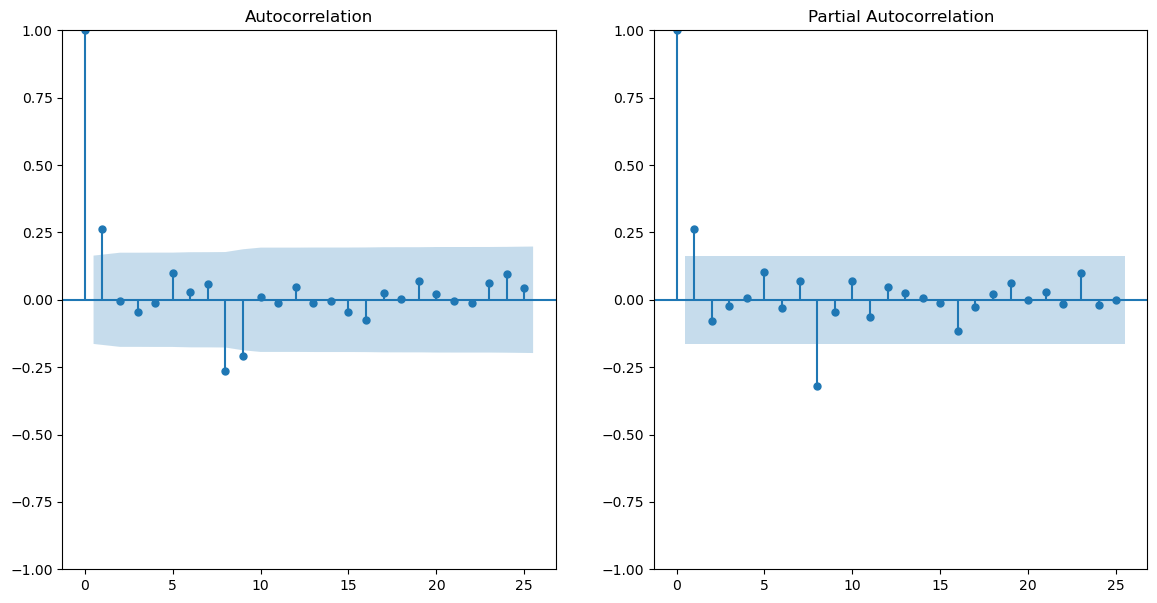

In [223]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Function to plot ACF and PACF
def plot_acf_pacf_line(series, lags):
    fig, ax = plt.subplots(1, 2, figsize=(14, 7))
    plot_acf(series, lags=lags, ax=ax[0])  # Plot ACF
    plot_pacf(series, lags=lags, ax=ax[1])  # Plot PACF

    plt.show()

# Plot ACF and PACF for Germany's wheat prices
plot_acf_pacf_line(germany_wheat_prices['Value'], 25)


In [224]:
 # print acf and pacf values
from statsmodels.tsa.stattools import acf, pacf

# Function to calculate ACF and PACF
def calculate_acf_pacf(series, lags):
    acf_vals = acf(series, nlags=lags)  # Calculate ACF values
    pacf_vals = pacf(series, nlags=lags)  # Calculate PACF values

    return acf_vals, pacf_vals

# Calculate ACF and PACF for Germany's wheat prices
acf_vals, pacf_vals = calculate_acf_pacf(germany_wheat_prices['Value'], 25)

# Print ACF and PACF values
print_heading('ACF Values')
for i, val in enumerate(acf_vals):
    print(f"Lag {i}: {val:.4f}")


------------------------------------------------------------
ACF VALUES
------------------------------------------------------------
Lag 0: 1.0000
Lag 1: 0.2610
Lag 2: -0.0047
Lag 3: -0.0435
Lag 4: -0.0104
Lag 5: 0.0993
Lag 6: 0.0281
Lag 7: 0.0588
Lag 8: -0.2634
Lag 9: -0.2086
Lag 10: 0.0119
Lag 11: -0.0121
Lag 12: 0.0460
Lag 13: -0.0113
Lag 14: -0.0032
Lag 15: -0.0470
Lag 16: -0.0766
Lag 17: 0.0239
Lag 18: 0.0031
Lag 19: 0.0715
Lag 20: 0.0230
Lag 21: -0.0052
Lag 22: -0.0117
Lag 23: 0.0616
Lag 24: 0.0951
Lag 25: 0.0435


 ## Observations
 * The Autocorrelation Function (ACF) values for lags 0 through 25 show a strong positive autocorrelation at the first lag `(Lag 1: 0.9524)`, which suggests a high level of linear predictability from one observation to the next in the time series data. This autocorrelation gradually decreases as the lags increase.

* By Lag 12, the autocorrelation is still positive `(Lag 12: 0.2794)` but has decreased substantially from Lag 1, indicating a seasonal pattern at an annual frequency, which is common in monthly data. After Lag 12, the ACF values continue to decline, suggesting that the direct correlation between observations diminishes as the time interval between them increases.

In [225]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.stattools import acf, pacf


def plot_acf_pacf(series, lags):
    # Calculate ACF and PACF
    acf_values = acf(series, nlags=lags)
    pacf_values = pacf(series, nlags=lags)

    # Create subplots
    fig = make_subplots(rows=2, cols=1)

    # Add ACF trace
    fig.add_trace(
        go.Scatter(
            x=list(range(len(acf_values))),
            y=acf_values,
            mode='lines+markers',
            name='ACF'
        ), row=1, col=1
    )

    # Add PACF trace
    fig.add_trace(
        go.Scatter(
            x=list(range(len(pacf_values))),
            y=pacf_values,
            mode='lines+markers',
            name='PACF'
        ), row=2, col=1
    )

    # Update layout
    fig.update_layout(
        title="ACF and PACF",
        showlegend=False
    )

    fig.update_xaxes(title_text="Lag", row=2, col=1)
    fig.update_yaxes(title_text="ACF", row=1, col=1)
    fig.update_yaxes(title_text="PACF", row=2, col=1)

    # Show plot
    fig.show()

plot_acf_pacf(germany_wheat_prices['Value'], 25)

# Fitting an AutoRegressive Model to Germany's Wheat Prices
In this section, we split the data into training and test sets. We then fit an AutoRegressive (AutoReg) model with 25 lags to the training data. The model summary is printed to provide detailed information about the model's performance.

In [226]:
X = germany_wheat_prices['Value'].values

In [227]:
# Split the data into training and test sets
train = X[:len(X)-7]
test = X[len(X)-7:]

# Fit an AutoReg model with 25 lags to the training data
model_germany = AutoReg(train, lags=25).fit()

# Print the model summary
print(model_germany.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  136
Model:                    AutoReg(25)   Log Likelihood                 190.724
Method:               Conditional MLE   S.D. of innovations              0.043
Date:                Thu, 15 Feb 2024   AIC                           -327.447
Time:                        08:29:35   BIC                           -254.290
Sample:                            25   HQIC                          -297.770
                                  136                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0036      0.004      0.871      0.384      -0.005       0.012
y.L1           0.3723      0.095      3.928      0.000       0.187       0.558
y.L2          -0.0611      0.101     -0.604      0.5

## Predicting Germany's Wheat Prices

In this section, we use the fitted AutoRegressive model to predict Germany's wheat prices. The `predict` method is used to generate predictions for the test set. The start and end parameters are set to ensure that the predictions align with the test set.


In [228]:
# Predict Germany's wheat prices using the fitted model
pred_germany = model_germany.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

## Visualizing Predicted vs Actual Wheat Prices in Germany

In [229]:
import plotly.graph_objects as go

def plot_prediction_vs_actual(pred_values, actual_values, x_labels=None, title='Predicted vs Actual Values'):

    # Check if x_labels are provided, otherwise use index
    if x_labels is None:
        x_labels = list(range(len(pred_values)))

    # Create traces for predicted and actual values
    trace_pred = go.Scatter(
        x=x_labels,
        y=pred_values,
        mode='lines',
        name='Predicted'
    )
    
    trace_actual = go.Scatter(
        x=x_labels,
        y=actual_values,
        mode='lines',
        name='Actual'
    )
    
    # Create the figure and add both traces
    fig = go.Figure()
    fig.add_trace(trace_pred)
    fig.add_trace(trace_actual)
    
    # Update layout with title and axis labels
    fig.update_layout(
        title=title,
        xaxis_title="Months" if x_labels is None else "",
        yaxis_title="Value",
        legend_title="Legend"
    )
    
    # Show the figure
    fig.show()

# Example usage:
plot_prediction_vs_actual(pred_germany, test, title='Germany Wheat Price Prediction Comparison')

## Calculating Root Mean Squared Error (RMSE) for the Model Predictions

This section of the code calculates the Root Mean Squared Error (RMSE) for the predictions made by the AutoRegressive model on Germany's wheat prices. RMSE is a commonly used metric to evaluate the performance of regression models, with lower values indicating better model performance.

In [230]:
# Calculate the mean squared erro
from sklearn.metrics import mean_squared_error

def rmse_calc(x, y):  
  return np.sqrt(mean_squared_error(x, y))

rmse = rmse_calc(test, pred_germany)
print_heading('Root Mean Squared Error (RMSE)')
print('Test RMSE: %.3f' % rmse)

------------------------------------------------------------
ROOT MEAN SQUARED ERROR (RMSE)
------------------------------------------------------------
Test RMSE: 0.084


## Observation


* `RMSE (0.084)` vs `Standard Deviation (0.054709)`: The RMSE is higher than the standard deviation of the actual prices, which is expected because RMSE is sensitive to outliers and penalizes larger errors more.

* Interpreting RMSE: Given that RMSE is a measure of the average magnitude of the errors, an RMSE of `0.084` indicates that the model's predictions are, on average, off by this amount from the actual scaled prices.

* To compare the RMSE to the actual prices, we should consider the range and standard deviation of the price data. Since the standard deviation is relatively small `(0.054709)`, an RMSE of `0.084` suggests that the prediction errors are larger than the typical variability in the actual prices. This could imply that the model's predictive accuracy is moderate, and there might be room for improvement. 

In [231]:
germany_wheat_prices['Value'].describe()

count    143.000000
mean       0.001415
std        0.054709
min       -0.192904
25%       -0.025492
50%        0.005935
75%        0.028029
max        0.298177
Name: Value, dtype: float64

# Forecast

### Generating Future Predictions for Germany's Wheat Prices

This section of the code is responsible for generating future predictions for Germany's wheat prices. The generate_predictions function is defined to create a DataFrame of future dates and corresponding predictions. The function also reverses the normalization of the predictions to return them to their original scale.

In [232]:
def generate_predictions(last_date_in_data, pred_future, periods,  country):
    if isinstance(last_date_in_data, str):
        last_date_in_data = pd.to_datetime(last_date_in_data)  # Convert to datetime if necessary

    # Generate future dates starting from the first day of the next month after last_date_in_data
    future_dates = pd.date_range(start=last_date_in_data + pd.offsets.MonthBegin(1), periods=periods, freq='MS')
    
    # Create a DataFrame for the future predictions
    predictions = pd.DataFrame(pred_future, columns=['Predicted'])
    predictions.index = future_dates  # Set the index to the future dates
    predictions.index.name = 'Date'  # Name the index 'Date'

    # Reverse the normalization of the predictions
    predictions = (predictions["Predicted"] * data_processors[country].stats['std'])  + data_processors[country].stats['mean']

    return predictions

## Forecasting Future Wheat Prices in Germany

In [233]:
# Predict future wheat prices for the next 24 months
forecase_months = 24
pred_future_germany = model_germany.predict(start=len(X)+1, end=len(X)+forecase_months, dynamic=False)

# Generate a DataFrame of future predictions
predictions = generate_predictions(germany_wheat_prices.index[-1], pred_future_germany, forecase_months, 'Germany')
predictions_germany = pd.DataFrame(predictions, columns=['Predicted'])
# convert the date to datetime object
predictions_germany.index = pd.to_datetime(predictions_germany.index)
predictions_germany

,Predicted
Date,
2023-01-01,187.692689
2023-02-01,195.391365
2023-03-01,197.512978
2023-04-01,192.133024
2023-05-01,188.315176
2023-06-01,194.866521
2023-07-01,195.497219
2023-08-01,188.017746
2023-09-01,199.794441


 # Observations
 The predicted wheat prices for `German producers`, expressed in `local currency units (LCU)` which is `Euro`, show a fluctuating trend throughout `2023 and 2024`, with prices ranging from a low of approximately `186.57` to a high of around `200.32`. There is a noticeable peak in `September 2023 and April 2024`, suggesting seasonal or market factors could be influencing wheat prices during these periods.

In [234]:
# get germany variable data for only year from 2022
germany = germany[germany.index.year >= 2022]


In [235]:
germany= (germany * data_processors['Germany'].stats['std']) + data_processors['Germany'].stats['mean']

In [236]:
# plot in plotly
def plot_predictions(predictions, actual, title, xlabel, ylabel):
    # Create a figure
    fig = go.Figure()

    # Add traces for actual and predicted values   
    fig.add_trace(go.Scatter(x=predictions.index, y=predictions['Predicted'], mode='lines', name='Predicted'))
    fig.add_trace(go.Scatter(x=germany.index, y=germany["Value"], mode='lines', name='Actual'))

    # Update layout with title and axis labels
    fig.update_layout(
        title={'text': title, 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
        xaxis_title=xlabel,
        yaxis_title=ylabel,
        font=dict(size=15),
        legend_title="Legend",
        margin=dict(l=20, r=20, t=40, b=20)
    )

    # Show plot
    fig.show()

plot_predictions(predictions_germany, germany_wheat_prices, 'Germany Wheat Price Forecast', 'Year', 'Wheat Prices LCU/Tonne - EURO')

# Belgium

 # Stationarity Check

### P-Value check via Augmented Dickey-Fuller (ADF) Test

In [237]:
belgium_wheat_prices = belgium_wheat_prices.dropna()
print_heading('ADF Test for for Belgium Wheat Prices')
perform_adfuller_test(belgium_wheat_prices['Value'])

------------------------------------------------------------
ADF TEST FOR FOR BELGIUM WHEAT PRICES
------------------------------------------------------------
1. ADF :  -1.1561112330217336
2. P-Value :  0.6921850782169459
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 120
5. Critical Values :
	 1% :  -3.486055829282407
	 5% :  -2.8859430324074076
	 10% :  -2.5797850694444446


## Observation
The p-value for the wheat prices in Belgium is `0.6921850782169459`, which is considerably high. Consequently, the test does not disprove the null hypothesis, suggesting a unit root's existence at any standard significance level. This implies that, based on this test, the wheat price data for `Belgium` is probably non-stationary.

### Preprocessing Data for Time Series Analysis

In [238]:
belgium_wheat_prices['Value'] = Preprocess_data(belgium_wheat_prices) \
                                .log_transform('Value') \
                                .differencing(interval=1)

## Check P-Value Again

In [239]:
belgium_wheat_prices = belgium_wheat_prices.dropna()
print_heading('ADF Test for for Spain Wheat Prices')
perform_adfuller_test(belgium_wheat_prices['Value'])

------------------------------------------------------------
ADF TEST FOR FOR SPAIN WHEAT PRICES
------------------------------------------------------------
1. ADF :  -9.883875257505784
2. P-Value :  3.7081076808401996e-17
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 119
5. Critical Values :
	 1% :  -3.4865346059036564
	 5% :  -2.8861509858476264
	 10% :  -2.579896092790057


## Observation
After applying differencing and a logarithmic transformation to the Belgium wheat prices, the **`p-value`** of the Augmented Dickey-Fuller (ADF) test has significantly decreased. Therefore, we can conclude that the transformed series is stationary.

In [240]:
# plot acf and pacf values
plot_acf_pacf(belgium_wheat_prices['Value'], 25)

In [241]:
# Calculate ACF and PACF for Germany's wheat prices
acf_vals, pacf_vals = calculate_acf_pacf(belgium_wheat_prices['Value'], 25)

# Print ACF and PACF values
print_heading('ACF Values')
for i, val in enumerate(acf_vals):
    print(f"Lag {i}: {val:.4f}")


------------------------------------------------------------
ACF VALUES
------------------------------------------------------------
Lag 0: 1.0000
Lag 1: 0.0862
Lag 2: -0.0589
Lag 3: -0.1233
Lag 4: 0.0069
Lag 5: 0.1110
Lag 6: -0.0229
Lag 7: -0.1387
Lag 8: -0.0798
Lag 9: -0.0199
Lag 10: 0.0106
Lag 11: 0.0484
Lag 12: -0.0085
Lag 13: 0.0645
Lag 14: -0.0671
Lag 15: 0.0265
Lag 16: 0.0219
Lag 17: -0.0191
Lag 18: -0.0352
Lag 19: 0.1239
Lag 20: 0.1034
Lag 21: 0.0585
Lag 22: -0.0678
Lag 23: -0.0856
Lag 24: -0.0502
Lag 25: -0.0811


In [242]:
plot_acf_pacf(belgium_wheat_prices['Value'], 25)

## Observations
* The autocorrelation is positive and strong at Lag 1 `(0.9446)`, indicating a high degree of similarity between consecutive observations. This pattern of declining autocorrelation continues, but at a slower rate compared to the first set, with the ACF value at Lag 12 `(0.3016)` still indicating a moderate level of autocorrelation.

* Notably, starting from Lag 24, the ACF values turn negative, with Lag 24 at `-0.0113` and Lag 25 at -`0.0274`. This suggests that by this point, the values in the time series are inversely correlated with their values approximately two years prior, although the negative correlation is quite weak. This could be indicative of a possible cyclical pattern where the time series might exhibit a regular interval of fluctuations.

# Fitting an AutoRegressive Model to Belgium's Wheat Prices

In [243]:
X = belgium_wheat_prices['Value'].dropna().values

In [244]:
# Split the data into training and test sets
train = X[:len(X)-7]
test = X[len(X)-7:]

# Fit an AutoReg model with 25 lags to the training data
model_belgium = AutoReg(train, lags=20).fit()

# Summary
print(model_belgium.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  113
Model:                    AutoReg(20)   Log Likelihood                 123.538
Method:               Conditional MLE   S.D. of innovations              0.064
Date:                Thu, 15 Feb 2024   AIC                           -203.076
Time:                        08:29:35   BIC                           -147.359
Sample:                            20   HQIC                          -180.579
                                  113                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0099      0.007      1.453      0.146      -0.003       0.023
y.L1           0.0568      0.101      0.564      0.573      -0.141       0.254
y.L2          -0.0083      0.110     -0.075      0.9

## Predicting Belgium's Wheat Prices

In [245]:
# Predict Belgium's wheat prices using the fitted model
pred_belgium= model_belgium.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

## Visualizing Predicted vs Actual Wheat Prices in Belgium

In [246]:
plot_prediction_vs_actual(pred_belgium, test, title='Belgium Wheat Price Prediction Comparison')

In [247]:
# Calculate the mean squared erro
rmse_belgium = rmse_calc(test, pred_belgium)
print_heading('Root Mean Squared Error (RMSE)')
print('Test RMSE: %.3f' % rmse_belgium)

------------------------------------------------------------
ROOT MEAN SQUARED ERROR (RMSE)
------------------------------------------------------------
Test RMSE: 0.156


## Observation
Considering the original standard deviation is about `0.076`, and the RMSE is `0.156`, the RMSE is approximately double the standard deviation. This indicates that the predictions are not very close to the actual values, as the typical prediction error is larger than the typical variation observed in the data.

In [248]:
belgium_wheat_prices.describe()

,Value
count,120.000000
mean,0.003667
std,0.076180
min,-0.242655
25%,-0.024712
50%,0.000000
75%,0.029123
max,0.342409


# Forecast
### Generating Future Predictions for Belgium Wheat Price

In [249]:
# future prediction

pred_future_belgium = model_belgium.predict(start=len(X)+1, end=len(X)+forecase_months, dynamic=False)

predictions = generate_predictions(belgium_wheat_prices.index[-1], pred_future_belgium, forecase_months, 'Belgium')
predictions_belgium = pd.DataFrame(predictions, columns=['Predicted'])
# convert the date to datetime object
predictions_belgium.index = pd.to_datetime(predictions_belgium.index)
predictions_belgium


,Predicted
Date,
2023-01-01,189.777874
2023-02-01,192.582259
2023-03-01,190.384752
2023-04-01,193.359909
2023-05-01,187.152743
2023-06-01,193.304762
2023-07-01,193.195475
2023-08-01,192.533235
2023-09-01,186.473574


## Observations
The predicted wheat prices for Belgium, given in Euros, display variability over the months of 2023 and 2024, fluctuating between a minimum of around `186.47` and a maximum of approximately `194.95`. Peaks in prices can be observed in February and November of 2023, while lows tend to occur around May and September of both years, hinting at potential seasonal impacts or cyclical market behaviors affecting pricing trends.

In [250]:
plot_predictions(predictions_belgium, belgium_wheat_prices, 'Belgium Wheat Price Forecast', 'Year', 'Wheat Prices LCU/Tonne - EURO')

 ## Visualize Predictions Comparison for Belgium and Germany Wheat Price

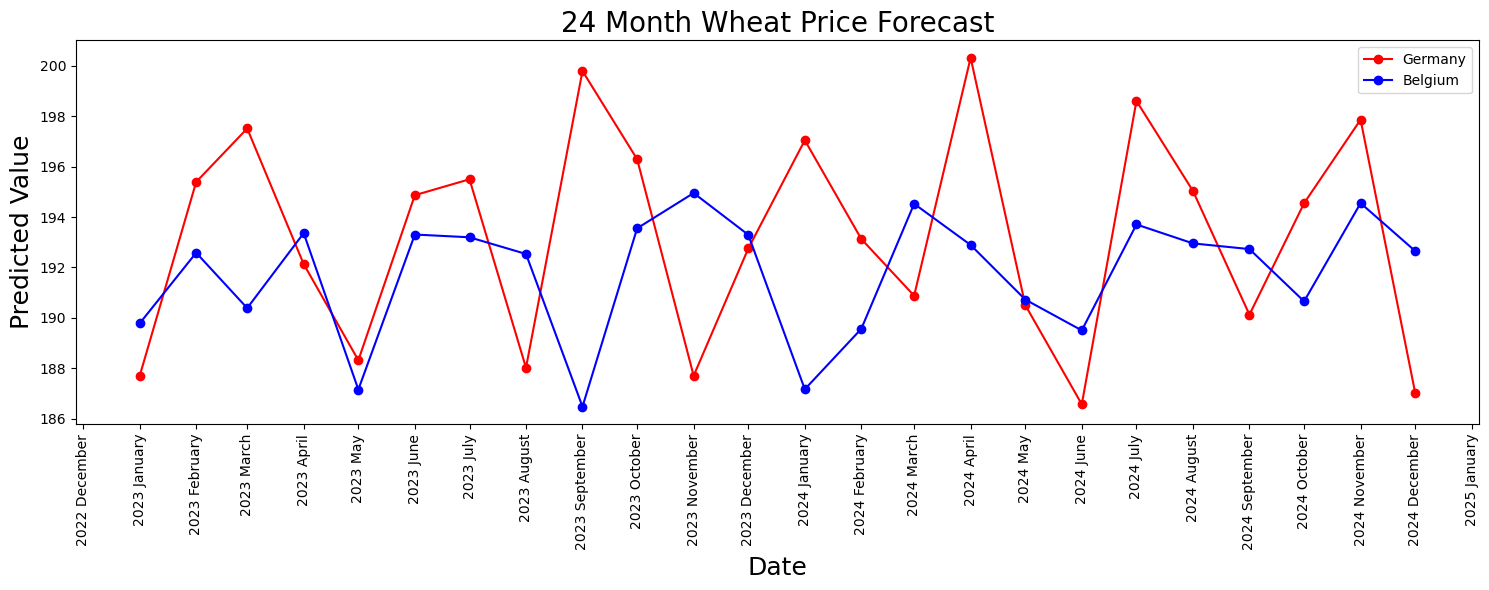

In [251]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_predictions(predictions, title='24 Month Wheat Price Forecast', xlabel='Date', ylabel='Predicted Value'):
    # Ensure that 'predictions' has a DateTime index

    # Plot the predictions
    plt.figure(figsize=(15,6))
    for prediction, label, color in predictions:
        plt.plot(prediction.index, prediction, label=label, color=color, marker='o')

    # Define the date format
    date_format = mdates.DateFormatter('%Y %B') 
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

    # Add title and labels
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)

    # Show legend
    plt.legend()

    # Rotate the date labels for better readability
    plt.xticks(rotation=90)

    # Show the plot
    plt.tight_layout()  
    plt.show()


predictions = [
    (predictions_germany, 'Germany', 'red'),
    (predictions_belgium, 'Belgium', 'blue')
]
plot_predictions(predictions)

# ARIMA

In [252]:
from pmdarima.arima import auto_arima
from pmdarima.arima.utils import ndiffs

 # Fitting ARIMA Model to Germany's Wheat Prices

In [253]:
X =  germany_wheat_prices.dropna()
y = X['Value']

In [254]:
# arima_germany = ARIMA(train, order=(0,0,1)).fit()
model = auto_arima(y, start_p=0, start_q=0,
                           max_p=2, max_q=5, m=12,
                           start_P=0, seasonal=True,
                           d=2, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,1,1)[12]             : AIC=-189.474, Time=0.38 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=-161.635, Time=0.04 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=-224.740, Time=0.23 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.84 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=-195.549, Time=0.13 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=-225.929, Time=0.46 sec
 ARIMA(1,2,0)(2,1,1)[12]             : AIC=-223.931, Time=1.16 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=-226.809, Time=0.71 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=-228.449, Time=0.36 sec
 ARIMA(1,2,0)(0,1,2)[12]             : AIC=-226.665, Time=1.00 sec
 ARIMA(1,2,0)(1,1,2)[12]             : AIC=-225.109, Time=2.08 sec
 ARIMA(2,2,0)(0,1,1)[12]             : AIC=-257.061, Time=0.45 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=-230.936, Time=0.23 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=-255.184, Time=0.89 sec
 ARIMA(2,2,0)(0,1,2)[12]

 ARIMA(1,2,1)(0,1,0)[12]             : AIC=inf, Time=0.34 sec
 ARIMA(1,2,1)(1,1,1)[12]             : AIC=inf, Time=0.85 sec
 ARIMA(1,2,1)(0,1,2)[12]             : AIC=inf, Time=1.51 sec
 ARIMA(1,2,1)(1,1,0)[12]             : AIC=inf, Time=0.49 sec
 ARIMA(1,2,1)(1,1,2)[12]             : AIC=inf, Time=1.81 sec
 ARIMA(1,2,2)(0,1,1)[12]             : AIC=inf, Time=1.02 sec
 ARIMA(0,2,2)(0,1,1)[12]             : AIC=inf, Time=0.60 sec
 ARIMA(2,2,2)(0,1,1)[12]             : AIC=-312.262, Time=0.48 sec
 ARIMA(2,2,2)(0,1,0)[12]             : AIC=inf, Time=0.42 sec
 ARIMA(2,2,2)(1,1,1)[12]             : AIC=inf, Time=0.98 sec
 ARIMA(2,2,2)(0,1,2)[12]             : AIC=-310.301, Time=2.60 sec
 ARIMA(2,2,2)(1,1,0)[12]             : AIC=inf, Time=0.62 sec
 ARIMA(2,2,2)(1,1,2)[12]             : AIC=inf, Time=2.72 sec
 ARIMA(2,2,3)(0,1,1)[12]             : AIC=inf, Time=1.06 sec
 ARIMA(1,2,3)(0,1,1)[12]             : AIC=-337.858, Time=1.04 sec
 ARIMA(1,2,3)(0,1,0)[12]             : AIC=inf, Time=0.

In [255]:
# summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  143
Model:             SARIMAX(1, 2, 3)x(0, 1, [1], 12)   Log Likelihood                 174.929
Date:                              Thu, 15 Feb 2024   AIC                           -337.858
Time:                                      08:30:19   BIC                           -320.699
Sample:                                  02-01-2011   HQIC                          -330.886
                                       - 12-01-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7688      0.087     -8.878      0.000      -0.939      -0.599
ma.L1         -0.9022      0.098     -9.197      0.000      -1.094      -0.710
ma.L2         -0.8914      0.104     -8.601      0.000      -1.095      -0.688
ma.L3          0.8035      0.086      9.322      0.000       0.635       0.972
ma.S.L12      -0.8407      0.151     -5.552      0.000      -1.137      -0.544
sigma2         0.0032      0.000      8.089      0.000       0.002       0.004
===================================================================================
Ljung-Box (L1) (Q):                   1.07   Jarque-Bera (JB):                98.52
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               1.40   Skew:                             1.05
Prob(H) (two-sided):                  0.28   Kurtosis:                         6.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predicting Germany's Wheat Prices with ARIMA

In [256]:
# Predict Germany's wheat prices using the fitted model
forecast = model.predict(n_periods=12)

In [257]:
def print_metrics(y, predictions):
    # Calculate the mean absolute error (MAE)
    mae = mean_absolute_error(y, predictions)
    print('MAE:', mae)

    # Calculate the mean squared error (MSE)
    mse = mean_squared_error(y, predictions)
    print('MSE:', mse)

    # Calculate the root mean squared error (RMSE)
    rmse = np.sqrt(mse)
    print('RMSE:', rmse)

    return {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    
    }
fitted_series = model.predict_in_sample()
print_heading('ARIMA Model Performance')
wheat_arima_metrics_germ = print_metrics(y, fitted_series)


------------------------------------------------------------
ARIMA MODEL PERFORMANCE
------------------------------------------------------------
MAE: 0.055455194844111724
MSE: 0.006482001023036472
RMSE: 0.08051087518488712


 ## Observations

  * Comparison of Error Metrics: The ARIMA model for predicting wheat prices in Germany has a Root Mean Squared Error (RMSE) of `0.08021`, which is slightly lower than the RMSE of `0.0805` for the Auto Regressor model. This suggests that, on average, the ARIMA model's predictions are closer to the actual prices than the Auto Regressor's predictions.

  * Additional Error Metrics for ARIMA: Besides RMSE, the ARIMA model's performance is characterized by a Mean Absolute Error (MAE) of `0.05492`, a Mean Squared Error (MSE) of `0.00643`. The MAE and MSE are relatively low, indicating good predictive accuracy.

# Visualizing the Forecast from ARIMA

In [258]:
# Convert fitted_series to DataFrame
fitted_series= pd.DataFrame(fitted_series)

# Denormalize fitted_series using Germany's stats
fitted_series = (fitted_series * data_processors['Germany'].stats['std']) + data_processors['Germany'].stats['mean']
fitted_series.columns = ['Value']  # Rename column to 'Value'

# Denormalize forecast using Germany's stats
forecast = (forecast * data_processors['Germany'].stats['std']) + data_processors['Germany'].stats['mean']


In [259]:
import plotly.graph_objects as go

def plot_predictions_inf(forecast_first, forecast_second=None, title=None, first_label=None, second_label=None):
  fig = go.Figure()

  # Add traces

  fig.add_trace(go.Scatter(x=forecast_first.index, y=forecast_first, mode='lines', name=first_label, line=dict(color='blue', width=2)))
  
  fig.add_trace(go.Scatter(x=forecast_second.index, y=forecast_second, mode='lines', name=second_label, line=dict(color='red', width=2)))

  # Add labels and title
  fig.update_layout(title=title, 
    xaxis_title='Months', 
    yaxis_title='Value',
    title_font_size=24,
    xaxis=dict(
          title_font=dict(size=20),  # Increase x-axis label text size
          tickfont=dict(size=14),  # Increase x-axis ticks text size
       
      ),
      yaxis=dict(
          title_font=dict(size=20),  # Increase y-axis label text size
          tickfont=dict(size=14),  # Increase y-axis ticks text size
    
    ), 
    width=800,
    height=600,
    )

  fig.show()

plot_predictions_inf(forecast, fitted_series['Value'], "ARIMA Prediction - Wheat Germany", 'Predicted', 'Historical')

In [260]:
data_processors['Germany'].stats

{'mean': 190.83402777777778, 'std': 50.84658560394829}

In [261]:
forecast

2023-01-01    189.900497
2023-02-01    190.396056
2023-03-01    191.489131
2023-04-01    190.778609
2023-05-01    189.805659
2023-06-01    188.734409
2023-07-01    186.287389
2023-08-01    190.489748
2023-09-01    189.557400
2023-10-01    191.163604
2023-11-01    190.539719
2023-12-01    188.977316
Freq: MS, dtype: float64

# Fitting ARIMA Model to Belgium's Wheat Prices

In [262]:
X = belgium_wheat_prices.dropna()
series = X['Value']

In [263]:
model = auto_arima(series, start_p=0, start_q=0,
                            max_p=7, max_q=5, m=12,
                            start_P=0, seasonal=True,
                            d=2, D=1, trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,1,1)[12]             : AIC=inf, Time=0.30 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=8.130, Time=0.04 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=-85.811, Time=0.21 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.67 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=-55.940, Time=0.04 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=-90.717, Time=0.61 sec


 ARIMA(1,2,0)(2,1,1)[12]             : AIC=inf, Time=1.41 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=0.40 sec
 ARIMA(0,2,0)(2,1,0)[12]             : AIC=-35.404, Time=0.36 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=-102.512, Time=0.53 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=-96.695, Time=0.20 sec
 ARIMA(2,2,0)(2,1,1)[12]             : AIC=inf, Time=1.52 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=inf, Time=0.68 sec
 ARIMA(3,2,0)(2,1,0)[12]             : AIC=-110.058, Time=0.64 sec
 ARIMA(3,2,0)(1,1,0)[12]             : AIC=-105.110, Time=0.25 sec
 ARIMA(3,2,0)(2,1,1)[12]             : AIC=inf, Time=1.83 sec
 ARIMA(3,2,0)(1,1,1)[12]             : AIC=inf, Time=0.69 sec
 ARIMA(4,2,0)(2,1,0)[12]             : AIC=-130.547, Time=0.86 sec
 ARIMA(4,2,0)(1,1,0)[12]             : AIC=-117.433, Time=0.11 sec
 ARIMA(4,2,0)(2,1,1)[12]             : AIC=inf, Time=2.19 sec
 ARIMA(4,2,0)(1,1,1)[12]             : AIC=inf, Time=0.91 sec
 ARIMA(5,2,0)(2,1,0)[12]             

In [264]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  120
Model:             SARIMAX(7, 2, 1)x(2, 1, 1, 12)   Log Likelihood                 100.923
Date:                            Thu, 15 Feb 2024   AIC                           -177.847
Time:                                    08:32:18   BIC                           -145.885
Sample:                                         0   HQIC                          -164.893
                                            - 120                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7111      0.135     -5.283      0.000      -0.975      -0.447
ar.L2         -0.5387      0.182     -2.955      0.003      -0.896      -0.181
ar.L3         -0.5744      0.238     -2.416      0.016      -1.040      -0.108
ar.L4         -0.4765      0.252     -1.890      0.059      -0.971       0.018
ar.L5         -0.1435      0.255     -0.562      0.574      -0.644       0.357
ar.L6          0.0078      0.235      0.033      0.974      -0.453       0.469
ar.L7         -0.0859      0.172     -0.498      0.618      -0.424       0.252
ma.L1         -0.9686      0.239     -4.048      0.000      -1.438      -0.500
ar.S.L12      -0.0307      0.233     -0.132      0.895      -0.487       0.425
ar.S.L24      -0.0943      0.186     -0.507      0.612      -0.459       0.270
ma.S.L12      -0.8368      0.331     -2.528      0.011      -1.486      -0.188
sigma2         0.0069      0.002      4.337      0.000       0.004       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                30.96
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                             0.39
Prob(H) (two-sided):                  0.81   Kurtosis:                         5.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Predicting Belgium's Wheat Prices with Arima

In [265]:
# Predict Belgium's wheat prices using the fitted model
forecast_belgium = model.predict(n_periods=12)

In [266]:
forecast_belgium

# add the date index 
forecast_belgium = pd.DataFrame(forecast_belgium.values, index=pd.date_range(start=belgium_wheat_prices.index[-1], periods=12, freq='M'), columns=['Value'])

In [267]:
forecast_belgium

,Value
2022-12-31,-0.161376
2023-01-31,-0.086713
2023-02-28,-0.000683
2023-03-31,0.011621
2023-04-30,-0.109358
2023-05-31,-0.125977
2023-06-30,-0.084085
2023-07-31,-0.099783
2023-08-31,-0.082764
2023-09-30,-0.107679


In [268]:
fitted_series = model.predict_in_sample()
print_heading('ARIMA Model Performance')
wheat_arima_metrics_bel = print_metrics(series, fitted_series)

------------------------------------------------------------
ARIMA MODEL PERFORMANCE
------------------------------------------------------------
MAE: 0.06773210685190806
MSE: 0.008580564233413893
RMSE: 0.09263133505144948


In [269]:
wheat_arima_metrics_bel

{'MAE': 0.06773210685190806,
 'MSE': 0.008580564233413893,
 'RMSE': 0.09263133505144948}

In [270]:
wheat_arima_metrics_germ

{'MAE': 0.055455194844111724,
 'MSE': 0.006482001023036472,
 'RMSE': 0.08051087518488712}

In [271]:

def plot_metric_comparison(metrics_set_1, metrics_set_2, title, set_names=('Set 1', 'Set 2')):
    # Create lists of values and labels for plotting
    values_1 = list(metrics_set_1.values())
    values_2 = list(metrics_set_2.values())
    labels = list(metrics_set_1.keys())

    # Create the bar charts
    fig = go.Figure(data=[
        go.Bar(name=set_names[0], x=labels, y=values_1),
        go.Bar(name=set_names[1], x=labels, y=values_2)
    ])

    # Update the layout
    fig.update_layout(
        barmode='group',
        title=title,
        xaxis_title='Metric',
        yaxis_title='Value',
        legend_title='Metric Sets',
         title_font=dict(size=24),  # Increase title text size
    xaxis=dict(
        title_font=dict(size=20),  # Increase x-axis label text size
        tickfont=dict(size=16),  # Increase x-axis ticks text size
    ),
    yaxis=dict(
        title_font=dict(size=20),  # Increase y-axis label text size
        tickfont=dict(size=16),  # Increase y-axis ticks text size
    )
    )

    # show values for each bar
    for i in range(len(labels)):
        fig.add_annotation(
            x=labels[i],
            y=values_1[i],
            text=f"{values_1[i]:.2f}",
            showarrow=True,
            arrowhead=1,
            yshift=10,
            xshift=-50
          
        )
        fig.add_annotation(
            x=labels[i],
            y=values_2[i],
            text=f"{values_2[i]:.2f}",
            showarrow=True,
            arrowhead=1,
            yshift=-10,
            xshift=50
        )
    # Show the figure
    fig.show()


plot_metric_comparison(wheat_arima_metrics_germ, wheat_arima_metrics_bel, "ARIMA Perfomance", set_names=('Germany', 'Belgium'))

In [272]:
fitted_series= pd.DataFrame(fitted_series)

# Denormalize fitted_series using Belgium's stats
fitted_series = (fitted_series * data_processors['Belgium'].stats['std']) + data_processors['Belgium'].stats['mean']
fitted_series.columns = ['Value']  # Rename column to 'Value'

# Denormalize forecast using Belgium's stats
forecast_belgium = (forecast_belgium * data_processors['Belgium'].stats['std']) + data_processors['Belgium'].stats['mean']

In [273]:
plot_predictions_inf(forecast_belgium['Value'], fitted_series['Value'], "Arima Prediction - Wheat Belgium", 'Predicted', 'Historical')

In [274]:
forecast_belgium

,Value
2022-12-31,178.227451
2023-01-31,182.502989
2023-02-28,187.429511
2023-03-31,188.134079
2023-04-30,181.206243
2023-05-31,180.254589
2023-06-30,182.653529
2023-07-31,181.754591
2023-08-31,182.729160
2023-09-30,181.302412


In [275]:
data_processors['Belgium'].stats

{'mean': 187.46859504132232, 'std': 57.26455132840014}

 # Fitting ARIMA Model to Germany and Belgium Food Inflation

In [276]:
# Inspect dataset
germany_food_inflation.head()

,Value
Date,
2001-01-01,1.766785
2001-02-01,1.522243
2001-03-01,3.301895
2001-04-01,4.220402
2001-05-01,5.724298


In [277]:
print_heading('Shape Inspection')
print('Germany Wheat Prices:', germany_wheat_prices.shape)

------------------------------------------------------------
SHAPE INSPECTION
------------------------------------------------------------
Germany Wheat Prices: (143, 1)


### P-Value check via Augmented Dickey-Fuller (ADF) Test

In [278]:
# acf and pacf for germany food inflation
germany_food_inflation = germany_food_inflation.dropna()
print_heading('ADF Test for Germany Inflation')
perform_adfuller_test(germany_food_inflation['Value'])


------------------------------------------------------------
ADF TEST FOR GERMANY INFLATION
------------------------------------------------------------
1. ADF :  -2.676422406317784
2. P-Value :  0.07820783804135333
3. Num Of Lags :  15
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 257
5. Critical Values :
	 1% :  -3.4560535712549925
	 5% :  -2.8728527662442334
	 10% :  -2.5727985212493754


## Observation
The p-value for the wheat prices in Belgium is `0.07820783804135333`, which is considerably high. Consequently, the test does not disprove the null hypothesis, suggesting a unit root's existence at any standard significance level. This implies that, based on this test, the inflation data for `Germany` is probably non-stationary.

### Preprocessing Data for Time Series Analysis

In [279]:
# Preprocess the data
germany_food_inflation = Preprocess_data(germany_food_inflation) \
                                .differencing(interval=1)

In [280]:
# Convert to DataFrame
germany_food_inflation = pd.DataFrame(germany_food_inflation, columns=['Value'])

In [281]:
# Drop NA values
germany_food_inflation = germany_food_inflation.dropna()

## Check P-Value Again

In [282]:
# Perform ADF test
print_heading('ADF Test for Germany Inflation after differencing and log transformation')
perform_adfuller_test(germany_food_inflation)

------------------------------------------------------------
ADF TEST FOR GERMANY INFLATION AFTER DIFFERENCING AND LOG TRANSFORMATION
------------------------------------------------------------
1. ADF :  -4.7863118559886875
2. P-Value :  5.776165771445567e-05
3. Num Of Lags :  15
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 256
5. Critical Values :
	 1% :  -3.4561550092339512
	 5% :  -2.8728972266578676
	 10% :  -2.5728222369384763


## Observations
After applying differencing and a logarithmic transformation to the Germany inflation, the **`p-value`** of the Augmented Dickey-Fuller (ADF) test has significantly decreased. Therefore, we can conclude that the transformed series is stationary.

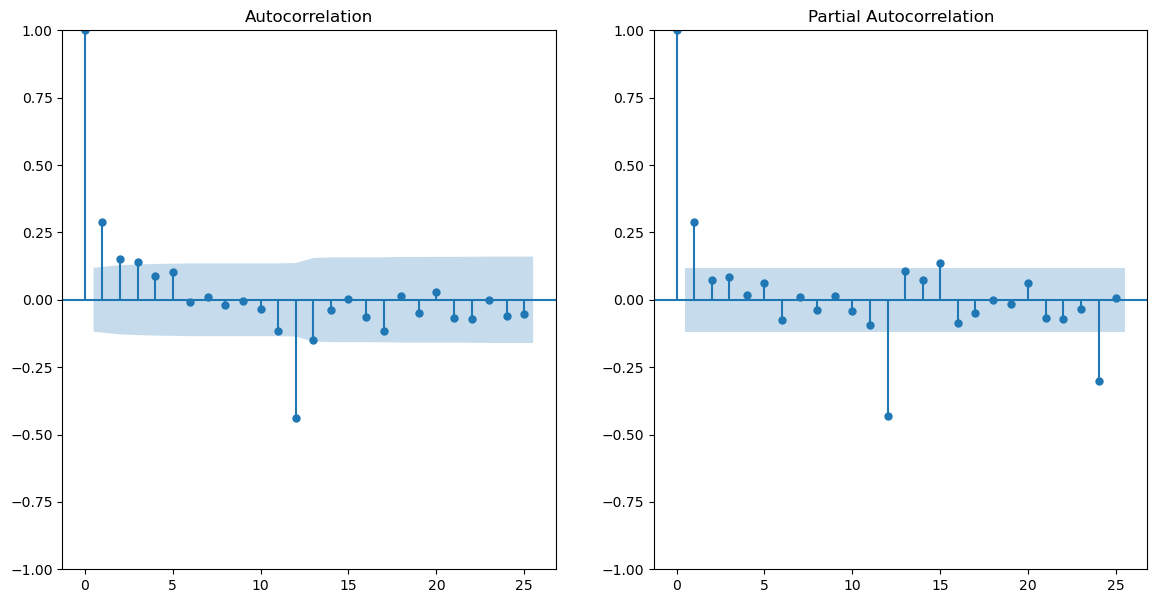

In [283]:
# plot acf and pacf
plot_acf_pacf_line(germany_food_inflation['Value'], 25)

In [284]:
# Display acf values
print_heading('ACF Values')
for i, val in enumerate(acf_vals):
    print(f"Lag {i}: {val:.4f}")

------------------------------------------------------------
ACF VALUES
------------------------------------------------------------
Lag 0: 1.0000
Lag 1: 0.0862
Lag 2: -0.0589
Lag 3: -0.1233
Lag 4: 0.0069
Lag 5: 0.1110
Lag 6: -0.0229
Lag 7: -0.1387
Lag 8: -0.0798
Lag 9: -0.0199
Lag 10: 0.0106
Lag 11: 0.0484
Lag 12: -0.0085
Lag 13: 0.0645
Lag 14: -0.0671
Lag 15: 0.0265
Lag 16: 0.0219
Lag 17: -0.0191
Lag 18: -0.0352
Lag 19: 0.1239
Lag 20: 0.1034
Lag 21: 0.0585
Lag 22: -0.0678
Lag 23: -0.0856
Lag 24: -0.0502
Lag 25: -0.0811


In [285]:
plot_acf_pacf(germany_food_inflation['Value'], 25)

# Fitting ARIMA Model to Germany's Food Inflation

In [286]:
from pmdarima.arima import auto_arima

In [287]:
X = germany_food_inflation.dropna()
y = X['Value']

In [288]:
#arima_inf_germany = ARIMA(train, order=(0,0,1)).fit()
model = auto_arima(y, start_p=1, start_q=1,
                           max_p=2, max_q=2, m=12,
                           start_P=0, seasonal=True,
                           d=2, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,1,1)[12]             : AIC=inf, Time=1.22 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=1298.868, Time=0.07 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=1049.538, Time=0.18 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.70 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=1176.075, Time=0.06 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=989.612, Time=0.38 sec


 ARIMA(1,2,0)(2,1,1)[12]             : AIC=inf, Time=3.62 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=0.70 sec
 ARIMA(0,2,0)(2,1,0)[12]             : AIC=1106.797, Time=0.18 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=894.701, Time=0.46 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=970.262, Time=0.15 sec
 ARIMA(2,2,0)(2,1,1)[12]             : AIC=inf, Time=2.45 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=inf, Time=0.81 sec
 ARIMA(2,2,1)(2,1,0)[12]             : AIC=inf, Time=2.77 sec
 ARIMA(1,2,1)(2,1,0)[12]             : AIC=inf, Time=2.56 sec
 ARIMA(2,2,0)(2,1,0)[12] intercept   : AIC=896.697, Time=0.95 sec

Best model:  ARIMA(2,2,0)(2,1,0)[12]          
Total fit time: 17.273 seconds


In [289]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  272
Model:             SARIMAX(2, 2, 0)x(2, 1, 0, 12)   Log Likelihood                -442.351
Date:                            Thu, 15 Feb 2024   AIC                            894.701
Time:                                    08:32:37   BIC                            912.466
Sample:                                02-01-2001   HQIC                           901.845
                                     - 09-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9607      0.043    -22.403      0.000      -1.045      -0.877
ar.L2         -0.5663      0.052    -10.927      0.000      -0.668      -0.465
ar.S.L12      -1.0971      0.059    -18.458      0.000      -1.214      -0.981
ar.S.L24      -0.5654      0.060     -9.411      0.000      -0.683      -0.448
sigma2         1.6801      0.156     10.791      0.000       1.375       1.985
===================================================================================
Ljung-Box (L1) (Q):                   8.04   Jarque-Bera (JB):                 3.09
Prob(Q):                              0.00   Prob(JB):                         0.21
Heteroskedasticity (H):               1.62   Skew:                             0.01
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Forecast

In [290]:
# Predict Germany's inflation using the fitted model
forecast_inf_germany = model.predict(n_periods=12)

In [291]:
predictions = pred_inf_germany = model.predict_in_sample()
print_heading('ARIMA Model Performance')
print_metrics(y, predictions)

------------------------------------------------------------
ARIMA MODEL PERFORMANCE
------------------------------------------------------------
MAE: 1.0960568238365884
MSE: 1.98135565224555
RMSE: 1.4076063555715959


{'MAE': 1.0960568238365884,
 'MSE': 1.98135565224555,
 'RMSE': 1.4076063555715959}

In [292]:
plot_predictions_inf(forecast_inf_germany, model.predict_in_sample(), 'Germany Food Inflation', 'Predicted', 'Historical')

In [293]:
forecast_inf_germany = (forecast_inf_germany * data_manager_inflation.data_processors['Germany'].stats['std']) + data_manager_inflation.data_processors['Germany'].stats['mean']

In [294]:
# plot predicted for inflation and germany wheat price together
def plot_predictions(predictions,  title, xlabel, ylabel):
    # Create a figure
    fig = go.Figure()

    fig.add_trace(go.Scatter                  
                  (x=predictions.index, y=predictions, mode='lines', name='Inflation'))
    
    # Update layout with title and axis labels
    fig.update_layout(
        title={'text': title, 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
        xaxis_title=xlabel,
        yaxis_title=ylabel,
        font=dict(size=15),
        legend_title="Legend",
        margin=dict(l=20, r=20, t=40, b=20)
    )

    # Show plot
    fig.show()

plot_predictions(forecast_inf_germany, 'Germany Inflation Forecast', 'Year', 'Wheat Prices LCU/Tonne - EURO')

# Fitting ARIMA Model To BELGIUM

In [295]:
# Inspect dataset
belgium_food_inflation.head()

,Value
Date,
2001-01-01,2.723005
2001-02-01,2.572142
2001-03-01,3.637733
2001-04-01,4.177358
2001-05-01,5.499868


In [296]:
print_heading('Shape Inspection')
print('Belgium Wheat Prices:', belgium_wheat_prices.shape)

------------------------------------------------------------
SHAPE INSPECTION
------------------------------------------------------------
Belgium Wheat Prices: (120, 1)


### P-Value check via Augmented Dickey-Fuller (ADF) Test

In [297]:
# acf and pacf for belgium food inflation
belgium_food_inflation = belgium_food_inflation.dropna()
print_heading('ADF Test for Belgium Inflation')
perform_adfuller_test(belgium_food_inflation['Value'])

------------------------------------------------------------
ADF TEST FOR BELGIUM INFLATION
------------------------------------------------------------
1. ADF :  -2.1566224327898866
2. P-Value :  0.22236379888860103
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 260
5. Critical Values :
	 1% :  -3.4557539868570775
	 5% :  -2.8727214497041422
	 10% :  -2.572728476331361


## Observation
The p-value for the wheat prices in Belgium is `0.22236379888860103`, which is considerably high. Consequently, the test does not disprove the null hypothesis, suggesting a unit root's existence at any standard significance level. This implies that, based on this test, the inflation data for `Belgium` is probably non-stationary.

### Preprocessing Data for Time Series Analysis

In [298]:
# Preprocess the data
belgium_food_inflation = Preprocess_data(belgium_food_inflation) \
                                .differencing(interval=1)

In [299]:
# Convert to DataFrame
belgium_food_inflation = pd.DataFrame(belgium_food_inflation, columns=['Value'])

In [300]:
# Drop NA values
belgium_food_inflation = belgium_food_inflation.dropna()

## Check P-Value Again

In [301]:
# Perform ADF test
print_heading('ADF Test for Belgium Inflation after differencing and log transformation')
perform_adfuller_test(belgium_food_inflation)

------------------------------------------------------------
ADF TEST FOR BELGIUM INFLATION AFTER DIFFERENCING AND LOG TRANSFORMATION
------------------------------------------------------------
1. ADF :  -7.255392303275344
2. P-Value :  1.736259022087903e-10
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 260
5. Critical Values :
	 1% :  -3.4557539868570775
	 5% :  -2.8727214497041422
	 10% :  -2.572728476331361


## Observations
After applying differencing and a logarithmic transformation to the Belgium food inflation, the **`p-value`** of the Augmented Dickey-Fuller (ADF) test has significantly decreased. The series is stationary now.

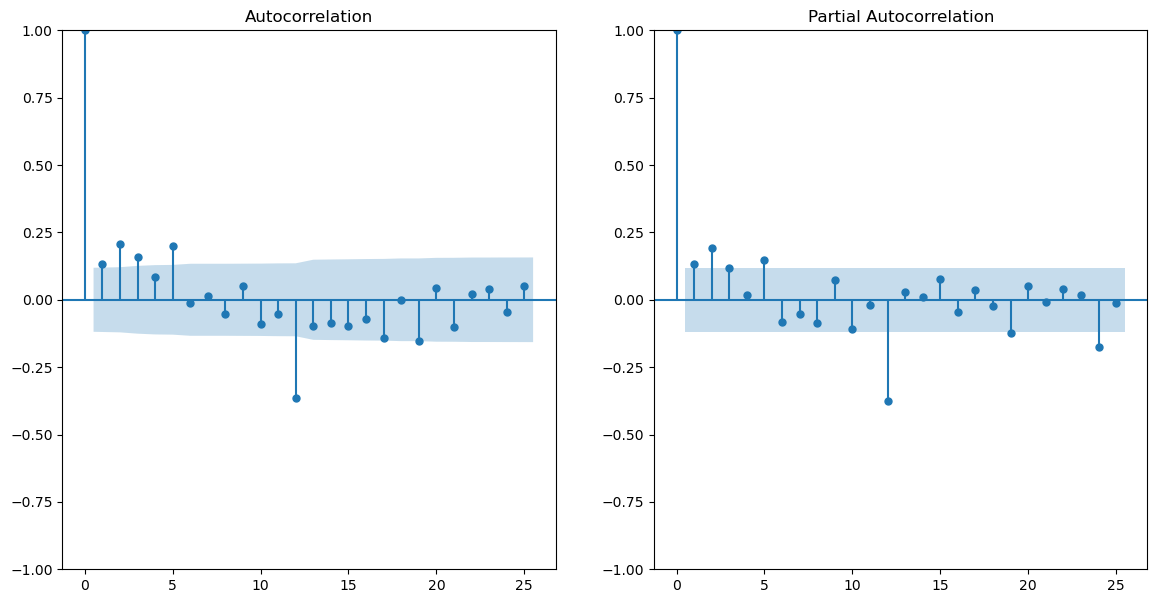

In [302]:
# plot acf and pacf
plot_acf_pacf_line(belgium_food_inflation['Value'], 25)

In [303]:
# Display acf values
print_heading('ACF Values')
for i, val in enumerate(acf_vals):
    print(f"Lag {i}: {val:.4f}")

------------------------------------------------------------
ACF VALUES
------------------------------------------------------------
Lag 0: 1.0000
Lag 1: 0.0862
Lag 2: -0.0589
Lag 3: -0.1233
Lag 4: 0.0069
Lag 5: 0.1110
Lag 6: -0.0229
Lag 7: -0.1387
Lag 8: -0.0798
Lag 9: -0.0199
Lag 10: 0.0106
Lag 11: 0.0484
Lag 12: -0.0085
Lag 13: 0.0645
Lag 14: -0.0671
Lag 15: 0.0265
Lag 16: 0.0219
Lag 17: -0.0191
Lag 18: -0.0352
Lag 19: 0.1239
Lag 20: 0.1034
Lag 21: 0.0585
Lag 22: -0.0678
Lag 23: -0.0856
Lag 24: -0.0502
Lag 25: -0.0811


In [304]:
plot_acf_pacf(belgium_food_inflation['Value'], 25)

In [305]:
X = belgium_food_inflation.dropna()
y = X['Value']

In [306]:
# arima_belgium = ARIMA(train, order=(0,0,1)).fit()
model = auto_arima(y, start_p=0, start_q=0,
                           max_p=2, max_q=5, m=12,
                           start_P=0, seasonal=True,
                           d=2, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,1,1)[12]             : AIC=inf, Time=0.52 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=1275.843, Time=0.06 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=1002.383, Time=0.18 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=1.08 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=1103.130, Time=0.08 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=943.464, Time=0.37 sec


 ARIMA(1,2,0)(2,1,1)[12]             : AIC=inf, Time=3.24 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=0.96 sec
 ARIMA(0,2,0)(2,1,0)[12]             : AIC=1107.929, Time=0.16 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=841.864, Time=0.30 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=904.293, Time=0.15 sec
 ARIMA(2,2,0)(2,1,1)[12]             : AIC=inf, Time=1.96 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=inf, Time=1.16 sec
 ARIMA(2,2,1)(2,1,0)[12]             : AIC=inf, Time=3.56 sec
 ARIMA(1,2,1)(2,1,0)[12]             : AIC=inf, Time=3.07 sec
 ARIMA(2,2,0)(2,1,0)[12] intercept   : AIC=843.859, Time=0.84 sec

Best model:  ARIMA(2,2,0)(2,1,0)[12]          
Total fit time: 17.692 seconds


In [307]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  272
Model:             SARIMAX(2, 2, 0)x(2, 1, 0, 12)   Log Likelihood                -415.932
Date:                            Thu, 15 Feb 2024   AIC                            841.864
Time:                                    08:32:56   BIC                            859.629
Sample:                                02-01-2001   HQIC                           849.008
                                     - 09-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0950      0.052    -21.150      0.000      -1.197      -0.994
ar.L2         -0.5818      0.048    -12.125      0.000      -0.676      -0.488
ar.S.L12      -0.9865      0.061    -16.077      0.000      -1.107      -0.866
ar.S.L24      -0.5085      0.054     -9.398      0.000      -0.615      -0.402
sigma2         1.3858      0.117     11.868      0.000       1.157       1.615
===================================================================================
Ljung-Box (L1) (Q):                  10.09   Jarque-Bera (JB):                 1.15
Prob(Q):                              0.00   Prob(JB):                         0.56
Heteroskedasticity (H):               0.65   Skew:                             0.07
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Forecast

In [308]:
# predict belgium inflation
forecast_inf_belgium = model.predict(n_periods=12)

In [309]:
predictions = pred_inf_belgium = model.predict_in_sample()
print_heading('ARIMA Model Performance')
print_metrics(y, predictions)

------------------------------------------------------------
ARIMA MODEL PERFORMANCE
------------------------------------------------------------
MAE: 1.0074911071798403
MSE: 1.7458232447535815
RMSE: 1.321296047354105


{'MAE': 1.0074911071798403,
 'MSE': 1.7458232447535815,
 'RMSE': 1.321296047354105}

In [310]:
data_manager_inflation.data_processors['Belgium'].stats

{'mean': 2.927002593406593, 'std': 3.342000112984033}

In [311]:
plot_predictions_inf(forecast_inf_belgium, model.predict_in_sample(), "Belgium", 'Predicted', 'Historical')

In [312]:
forecast_inf_belgium = (forecast_inf_belgium * data_manager_inflation.data_processors['Belgium'].stats['std']) + data_manager_inflation.data_processors['Belgium'].stats['mean']

In [313]:
plot_predictions(forecast_inf_belgium, 'Belgium Inflation Forecast', 'Year', 'Wheat Prices LCU/Tonne - EURO')

In [314]:
# plot comparison forecast for germany and belgium food  inflation using plotly
def plot_predictions(first_predictions, second_predictions, title, xlabel, ylabel):
    # Create a figure
    fig = go.Figure()

    fig.add_trace(go.Scatter                  
                  (x=first_predictions.index, y=first_predictions, mode='lines+markers', name='Germany'))
    fig.add_trace(go.Scatter                  
                  (x=second_predictions.index, y=second_predictions, mode='lines+markers', name='Belgium'))
    
    # Update layout with title and axis labels
    fig.update_layout(
        title={'text': title, 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
        xaxis_title=xlabel,
        yaxis_title=ylabel,
        font=dict(size=18),
        legend_title="Legend",
        margin=dict(l=20, r=20, t=40, b=20)
    )

    # Show plot
    fig.show()

plot_predictions(forecast_inf_germany, forecast_inf_belgium, 'Germany and Belgium Inflation Forecast', 'Year', 'Food Inflation %')






# SARIMA

## Fitting SARIMA Model to Germany's Wheat Prices

In [315]:
import statsmodels.api as sm

# Define the order parameters for the SARIMAX model
p, d, q = 3, 0, 2

# Initialize the SARIMAX model
model= sm.tsa.statespace.SARIMAX(y, order=(p, d, q), seasonal_order=(p, d, q, 12))

# Fit the model to the data
model = model.fit()

# Display the model summary
model.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02628D+00    |proj g|=  2.16040D-01

At iterate    5    f=  9.65887D-01    |proj g|=  2.87086D-02

At iterate   10    f=  9.54682D-01    |proj g|=  5.56466D-02

At iterate   15    f=  9.49549D-01    |proj g|=  1.67732D-02



At iterate   20    f=  9.47754D-01    |proj g|=  5.48990D-03

At iterate   25    f=  9.47340D-01    |proj g|=  1.76614D-03

At iterate   30    f=  9.46619D-01    |proj g|=  1.37912D-02

At iterate   35    f=  9.45268D-01    |proj g|=  5.79083D-03

At iterate   40    f=  9.45204D-01    |proj g|=  3.26867D-03

At iterate   45    f=  9.45193D-01    |proj g|=  6.80160D-04

At iterate   50    f=  9.45191D-01    |proj g|=  9.53200D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     57      1     0     0   9.532D-05   9.452D-01
  F =  0.94519109348073183     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Value   No. Observations:                  272
Model:             SARIMAX(3, 0, 2)x(3, 0, 2, 12)   Log Likelihood                -257.092
Date:                            Thu, 15 Feb 2024   AIC                            536.184
Time:                                    08:33:03   BIC                            575.848
Sample:                                02-01-2001   HQIC                           552.108
                                     - 09-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2740      0.164     -1.669      0.095      -0.596       0.048
ar.L2          0.6036      0.138      4.385      0.000       0.334       0.873
ar.L3          0.2410      0.073      3.315      0.001       0.099       0.384
ma.L1          0.3226      0.164      1.962      0.050       0.000       0.645
ma.L2         -0.4330      0.164     -2.645      0.008      -0.754      -0.112
ar.S.L12      -0.9614      0.318     -3.019      0.003      -1.586      -0.337
ar.S.L24      -0.1080      0.308     -0.350      0.726      -0.712       0.496
ar.S.L36      -0.0267      0.159     -0.168      0.867      -0.339       0.285
ma.S.L12       0.3328      0.321      1.038      0.299      -0.296       0.961
ma.S.L24      -0.5619      0.172     -3.259      0.001      -0.900      -0.224
sigma2         0.3763      0.032     11.882      0.000       0.314       0.438
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.91
Prob(Q):                              0.98   Prob(JB):                         0.23
Heteroskedasticity (H):               1.07   Skew:                            -0.08
Prob(H) (two-sided):                  0.75   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predicting Germany's Wheat Prices

In [316]:
pred = predictions = model.predict(start=len(y), end=len(y)+12)

## Visualizing Predicted vs Actual Wheat Prices in Germany

In [317]:
plot_predictions_inf(pred, y, 'Germany', 'Predicted', 'Historical')

In [318]:
# Display performance
print_heading('SARIMA Model Performance')
print_metrics(y[len(y)-13:], predictions)

------------------------------------------------------------
SARIMA MODEL PERFORMANCE
------------------------------------------------------------
MAE: 1.8313540716143006
MSE: 4.095569225127215
RMSE: 2.023751275509719


{'MAE': 1.8313540716143006,
 'MSE': 4.095569225127215,
 'RMSE': 2.023751275509719}

## Observations



  * Comparison of Error Metrics: The SARIMA model has a Root Mean Squared Error `(RMSE) of 2.2375`, which is higher than the `RMSE of 0.08021` for the ARIMA model. This indicates that the ARIMA model's predictions are, on average, closer to the actual prices than the SARIMA model's predictions in this particular case.

# Conclusion:
The comparative analysis and forecasting of wheat prices and food inflation trends from 2018 to 2023 in Germany and Belgium underscore the interconnected nature of agricultural commodities and broader economic indicators. The use of time series analysis and ARIMA forecasting models has provided a window into future expectations for wheat prices, which bear direct relevance to food inflation rates. Policymakers and stakeholders are advised to use these predictive insights to inform decision-making, with an eye towards stabilizing the wheat market and mitigating the knock-on effects on inflation. By anticipating future trends, they can implement strategies that safeguard against potential volatility, ensuring economic stability and food security.